/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SGD: Accuracy = 0.8667, Time = 2.26 sec
Adam: Accuracy = 0.9333, Time = 3.11 sec
RMSprop: Accuracy = 0.9333, Time = 1.85 sec


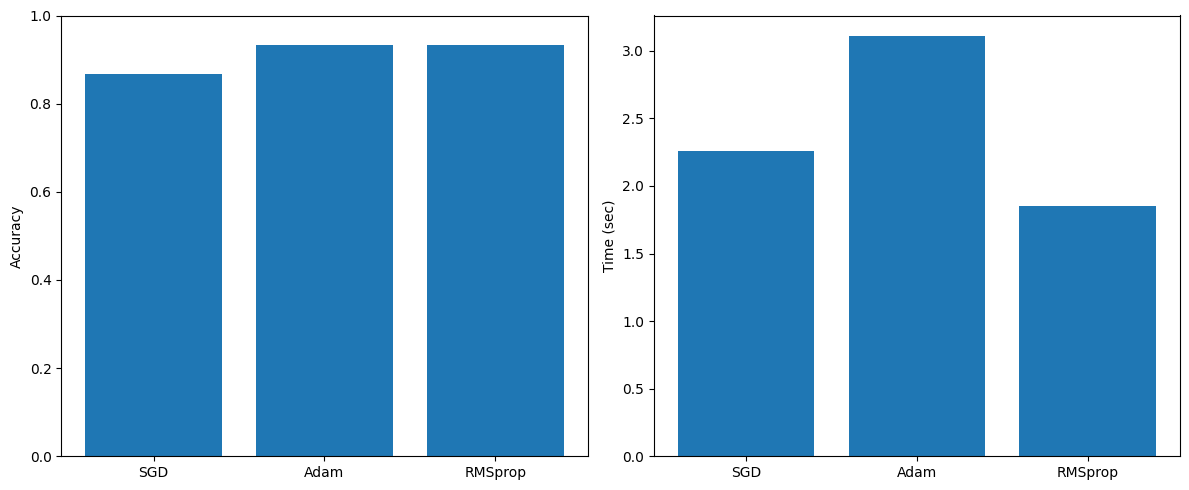

In [14]:
# THIS IS 1 WITH TIME AS  A METRIC
#PROGRAM 1 : Compare the performance of different optimizers on a single regression or classification

import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# 1. Load and preprocess Iris dataset
X, y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2. Function to train and evaluate
def train_model(optimizer, name):
    model = Sequential([
        Dense(10, activation='tanh', input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.time()
    model.fit(X_train, y_train, epochs=20, verbose=0)
    duration = time.time() - start
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"{name}: Accuracy = {accuracy:.4f}, Time = {duration:.2f} sec")
    return accuracy, duration

# 3. Run for different optimizers
optimizers = [('SGD', SGD(0.01)), ('Adam', Adam(0.01)), ('RMSprop', RMSprop(0.01))]
names, accuracies, times = [], [], []

for name, opt in optimizers:
    acc, dur = train_model(opt, name)
    names.append(name)
    accuracies.append(acc)
    times.append(dur)

# 4. Plotting
plt.figure(figsize=(12, 5))

# Accuracy bar chart
plt.subplot(1, 2, 1)
plt.bar(names, accuracies)
plt.ylim(0, 1)
plt.ylabel('Accuracy')

# Time bar chart
plt.subplot(1, 2, 2)
plt.bar(names, times)
plt.ylabel('Time (sec)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


HeNormal: 0.6333
GlorotUniform: 0.8333
RandomNormal: 0.7000


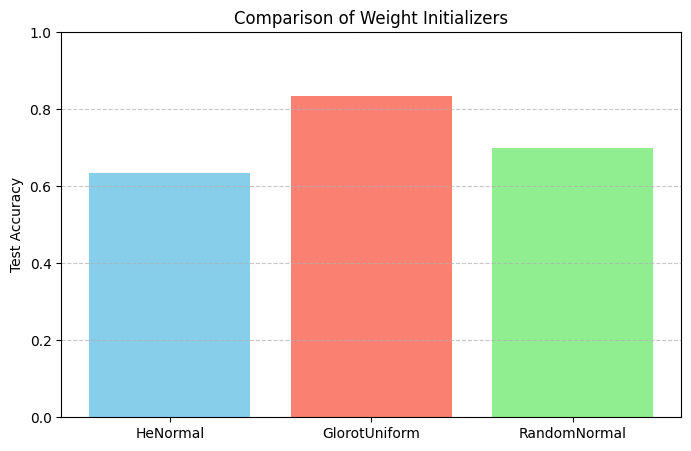

In [24]:
# PROGRAM 2 : Experiment with different weight initialization techniques & observer their impact on model convergence

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal, GlorotUniform, RandomNormal
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Data preparation
X, y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
results = {}

# Train function
def train(init):
    model = Sequential([
        Dense(10, activation='relu', kernel_initializer=init, input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=20, verbose=0)
    acc = model.evaluate(X_test, y_test, verbose=0)[1]
    name = type(init).__name__
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Evaluate all initializers
for initializer in [HeNormal(), GlorotUniform(), RandomNormal(0., 0.05)]:
    train(initializer)

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Comparison of Weight Initializers')
plt.ylabel('Test Accuracy')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


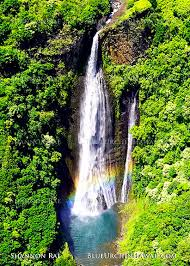

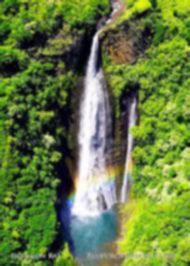

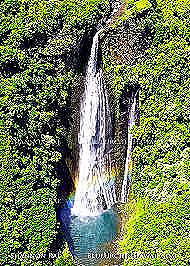

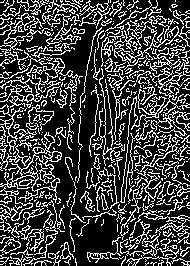

In [25]:
# PROGRAM 3 : Apply convolution filters to an image and visualize the extracted features

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('image.jpeg')

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply sharpening filter
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)

# Edge detection on the blurred image
edges = cv2.Canny(blurred_image, 50, 150)

# Display results
cv2_imshow(image)
cv2_imshow(blurred_image)
cv2_imshow(sharpened_image)
cv2_imshow(edges)

In [2]:
#PROGRAM 4 : Apply CNN on CIFAR 10

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.8768 - loss: 0.4306 - val_accuracy: 0.9840 - val_loss: 0.0607
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9825 - loss: 0.0580 - val_accuracy: 0.9867 - val_loss: 0.0479
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.9879 - loss: 0.0377 - val_accuracy: 0.9893 - val_loss: 0.0386
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9860 - val_loss: 0.0479
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9900 - val_loss: 0.0406
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9872 - loss: 0.0389

Test Accuracy: 0.9898


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


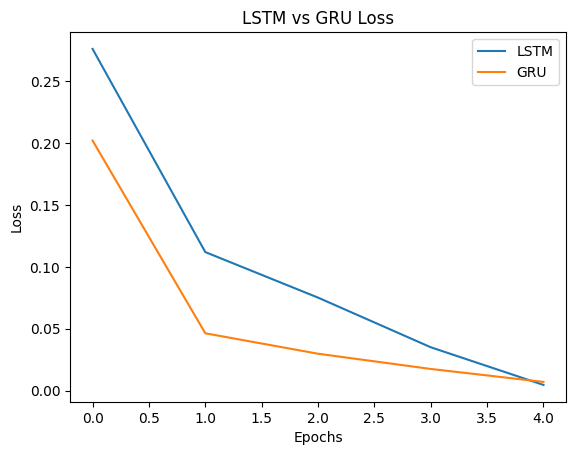

In [1]:
# PROGRAM 5 : Ozone Prediction using LSTM and GRU

import numpy as np, tensorflow as tf, matplotlib.pyplot as plt

# Data
data = np.sin(np.linspace(0, 100, 1000))
X = np.array([data[i-10:i] for i in range(10, len(data))])[..., None]
y = data[10:]

# Train function
def train(cell):
    model = tf.keras.Sequential([cell(32, input_shape=(10, 1)), tf.keras.layers.Dense(1)])
    model.compile('adam', 'mse')
    return model.fit(X, y, epochs=5, verbose=0).history['loss']

lstm_loss = train(tf.keras.layers.LSTM)
gru_loss = train(tf.keras.layers.GRU)

# Results
plt.plot(lstm_loss, label='LSTM'), plt.plot(gru_loss, label='GRU')
plt.xlabel('Epochs'), plt.ylabel('Loss'), plt.title('LSTM vs GRU Loss'), plt.legend()
plt.show()


Training with LSTM

Training with GRU


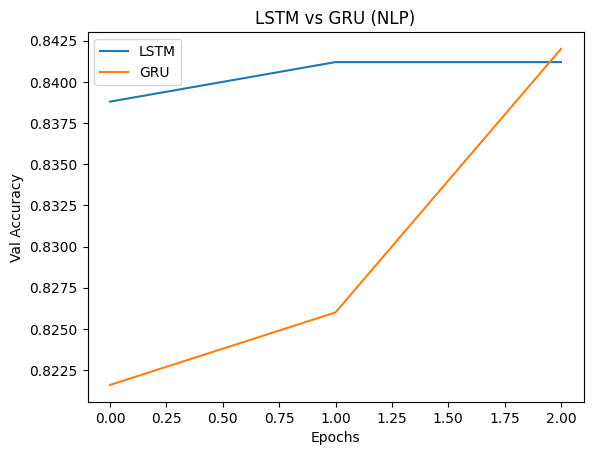

In [29]:
# PROGRAM 6 : LSTM vs GRU for word embeddings(Nlp based)


import tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data (IMDb sentiment: binary classification)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)
X_train, X_test = pad_sequences(X_train, maxlen=100), pad_sequences(X_test, maxlen=100)

# Train function
def train(cell):
    print(f"\nTraining with {cell.__name__}")
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(5000, 32, input_length=100),
        cell(32),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
    h = model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=0, validation_split=0.1)
    return h.history['val_accuracy']

lstm_acc = train(tf.keras.layers.LSTM)
gru_acc = train(tf.keras.layers.GRU)

# Results
plt.plot(lstm_acc, label='LSTM'), plt.plot(gru_acc, label='GRU')
plt.xlabel('Epochs'), plt.ylabel('Val Accuracy'), plt.title('LSTM vs GRU (NLP)'), plt.legend()
plt.show()

In [30]:
# PROGRAM 7 : Transformer model for language translation


import numpy as np, tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Training data
eng = ["hello", "thank you"]
fre = ["<start> bonjour <end>", "<start> merci <end>"]

# Tokenization
eng_tok = Tokenizer(); fre_tok = Tokenizer(filters='', oov_token='<unk>')
eng_tok.fit_on_texts(eng); fre_tok.fit_on_texts(fre)

eng_seq = pad_sequences(eng_tok.texts_to_sequences(eng), padding='post')
fre_seq = pad_sequences(fre_tok.texts_to_sequences(fre), padding='post')
dec_inp = fre_seq[:, :-1]; dec_tar = fre_seq[:, 1:]

# Model
vocab_eng = len(eng_tok.word_index)+1
vocab_fre = len(fre_tok.word_index)+1
max_len = eng_seq.shape[1]; embed = 32; latent = 64

enc_in = Input(shape=(max_len,))
enc_emb = Embedding(vocab_eng, embed)(enc_in)
_, h, c = LSTM(latent, return_state=True)(enc_emb)

dec_in = Input(shape=(dec_inp.shape[1],))
dec_emb = Embedding(vocab_fre, embed)(dec_in)
dec_out = LSTM(latent, return_sequences=True)(dec_emb, initial_state=[h, c])
out = Dense(vocab_fre, activation='softmax')(dec_out)

model = Model([enc_in, dec_in], out)
model.compile('adam', 'sparse_categorical_crossentropy')
model.fit([eng_seq, dec_inp], dec_tar, epochs=300, verbose=0)

# Translate function
def translate(text):
    inp = pad_sequences(eng_tok.texts_to_sequences([text]), maxlen=max_len, padding='post')
    out = [fre_tok.word_index['<start>']]

    for _ in range(dec_inp.shape[1]):
        dec_seq = pad_sequences([out], maxlen=dec_inp.shape[1], padding='post')
        pred = model.predict([inp, dec_seq], verbose=0)
        next_token = np.argmax(pred[0, len(out)-1])
        if next_token == fre_tok.word_index['<end>']: break
        out.append(next_token)

    return ' '.join(fre_tok.index_word[i] for i in out[1:])

# Test
print(translate("hello"))       # bonjour
print(translate("thank you"))   # merci

bonjour
merci


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

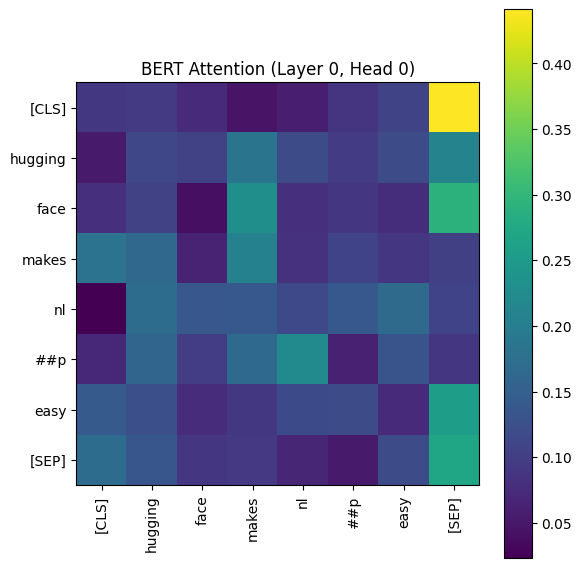

In [4]:
# PROGRAM 8 : Hugging Face model visualization


import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from transformers import TFBertModel, BertTokenizer
import matplotlib.pyplot as plt
import numpy as np
# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertModel.from_pretrained("bert-base-uncased", output_attentions=True)
# Input text
sentence = "Hugging Face makes NLP easy"
inputs = tokenizer(sentence, return_tensors="tf")
# Get outputs (includes attention weights)
outputs = model(**inputs)
attentions = outputs.attentions  # Tuple of (layer, batch, head, seq_len, seq_len)
# Visualize attention from layer 0, head 0
attn = attentions[0][0, 0].numpy()  # shape: (seq_len, seq_len)
# Plot attention heatmap
tokens = tokenizer.tokenize(sentence)
tokens = ['[CLS]'] + tokens + ['[SEP]']
plt.figure(figsize=(6, 6))
plt.imshow(attn, cmap='viridis')
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(tokens)), tokens)
plt.colorbar()
plt.title("BERT Attention (Layer 0, Head 0)")
plt.tight_layout()
plt.show()